In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [3]:
# 2. Load dataset
df = pd.read_csv('Bank Target Marketing Dataset.csv')

In [4]:
# 3. Display basic info
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())

Dataset Shape: (56373, 17)

First 5 rows:
    age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  

Missing values:
 age          0
job          0
marital 

In [5]:
# 4. Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [9]:
# 5. Feature selection
X = df.drop('deposit', axis=1)  # 'deposit' is the target column
y = df['deposit']

In [10]:
# 6. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# 7. Build decision tree model
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [12]:
# 8. Predict on test data
y_pred = model.predict(X_test)

In [13]:
# 9. Evaluate model
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy Score: 0.8640354767184035

Confusion Matrix:
 [[8787  388]
 [1145  955]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      9175
           1       0.71      0.45      0.55      2100

    accuracy                           0.86     11275
   macro avg       0.80      0.71      0.74     11275
weighted avg       0.85      0.86      0.85     11275



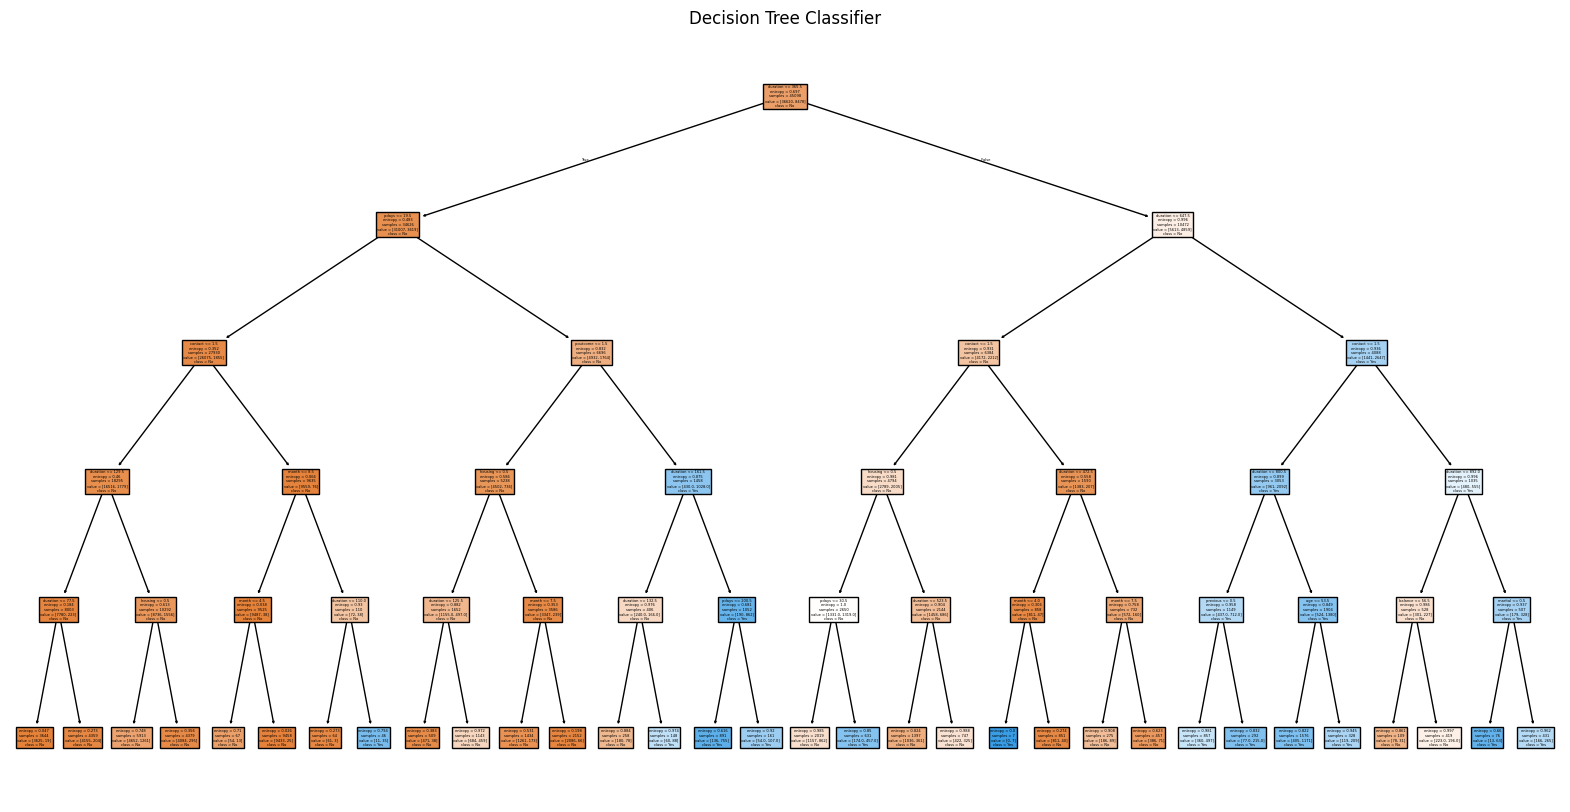

In [14]:
# 10. Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree Classifier")
plt.show()

In [ ]:
====